In [2]:
%matplotlib inline
from preprocessor import *

fifa = pd.read_csv("/home/saazi/Documents/datasets/fifa18/CompleteDataset.csv")
fifa.shape
fifa.dtypes
features = fifa.iloc[:,:40]
crap = ['Unnamed: 0','Photo',  'Flag', 
        'Club Logo','Potential','Special','Free kick accuracy','Heading accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes',
]

prep = Preprocessor(fifa)
print(features.shape)
#features = prep.drop_cols(features,crap)
features.drop(crap,1,inplace=True)
print(features.shape)


(17981, 40)
(17981, 27)


In [3]:

Agility = features.loc[~features['Agility'].str.contains('\D',regex=True)]

#agility = features.loc[~features['Agility'].str.contains('\+')]
Acceleration = Agility.loc[~Agility['Acceleration'].str.contains('\D',regex=True)]

Balance = Acceleration.loc[~Acceleration['Balance'].str.contains('\D',regex=True)]
Ball_control = Balance.loc[~Balance['Ball control'].str.contains('\D',regex=True)]
Composure = Ball_control.loc[~Ball_control['Composure'].str.contains('\D',regex=True)]
Crossing = Composure.loc[~Composure['Crossing'].str.contains('\D',regex=True)]
Curve = Crossing.loc[~Crossing['Curve'].str.contains('\D',regex=True)]
Dribbling = Curve.loc[~Curve['Dribbling'].str.contains('\D',regex=True)]
Finishing = Dribbling.loc[~Dribbling['Finishing'].str.contains('\D',regex=True)]
Interceptions = Finishing.loc[~Finishing['Interceptions'].str.contains('\D',regex=True)]
#Heading_accuracy = FK_accuracy.loc[~FK_accuracy['Heading accuracy'].str.contains('\D',regex=True)]
#Heading_accuracy
Jumping = Interceptions.loc[~Interceptions['Jumping'].str.contains('\D',regex=True)]
Aggression = Jumping.loc[~Jumping['Aggression'].str.contains('\D',regex=True)]
fifa18 = Aggression.iloc[:,:19]
fifa18.head()

,Name,Age,Nationality,Overall,Club,Value,Wage,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Interceptions,Jumping
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,€95.5M,€565K,89,63,89,63,93,95,85,81,91,94,29,95
1,L. Messi,30,Argentina,93,FC Barcelona,€105M,€565K,92,48,90,95,95,96,77,89,97,95,22,68
2,Neymar,25,Brazil,92,Paris Saint-Germain,€123M,€280K,94,56,96,82,95,92,75,81,96,89,36,61
3,L. Suárez,30,Uruguay,92,FC Barcelona,€97M,€510K,88,78,86,60,91,83,77,86,86,94,41,69
4,M. Neuer,31,Germany,92,FC Bayern Munich,€61M,€230K,58,29,52,35,48,70,15,14,30,13,30,78


In [4]:
fifa18.dtypes

Name             object
Age               int64
Nationality      object
Overall           int64
Club             object
Value            object
Wage             object
Acceleration     object
Aggression       object
Agility          object
Balance          object
Ball control     object
Composure        object
Crossing         object
Curve            object
Dribbling        object
Finishing        object
Interceptions    object
Jumping          object
dtype: object

In [5]:
fifa18['Club'].value_counts()

Villarreal CF                      35
UD Las Palmas                      34
VfL Wolfsburg                      34
Borussia Dortmund                  34
Newcastle United                   33
Southampton                        33
FC Nantes                          33
Everton                            33
RC Deportivo de La Coruña          33
Eintracht Frankfurt                33
Huddersfield Town                  33
Hannover 96                        33
ES Troyes AC                       33
Amiens SC Football                 33
FC Augsburg                        33
Arsenal                            33
Manchester City                    33
Stade Rennais FC                   32
RB Leipzig                         32
Fiorentina                         32
Atlético Madrid                    32
Hamburger SV                       32
Bournemouth                        32
Leicester City                     32
Udinese                            32
SC Freiburg                        32
Málaga CF   

In [6]:
fifa18['Agility'] = pd.to_numeric(fifa18['Agility'])
fifa18['Acceleration'] = pd.to_numeric(fifa18['Acceleration'])
fifa18['Aggression'] = pd.to_numeric(fifa18['Aggression'])
fifa18['Balance'] = pd.to_numeric(fifa18['Balance'])
fifa18['Ball control'] = pd.to_numeric(fifa18['Ball control'])
fifa18['Composure'] = pd.to_numeric(fifa18['Composure'])
fifa18['Crossing'] = pd.to_numeric(fifa18['Crossing'])
fifa18['Curve'] = pd.to_numeric(fifa18['Curve'])
fifa18['Dribbling'] = pd.to_numeric(fifa18['Dribbling'])
fifa18['Finishing'] = pd.to_numeric(fifa18['Finishing'])
fifa18['Interceptions'] = pd.to_numeric(fifa18['Interceptions'])
fifa18['Jumping'] = pd.to_numeric(fifa18['Jumping'])



cat_attributes ,num_attributes = prep.column_types(fifa18)
categorical = fifa18[cat_attributes]
numerical = fifa18[num_attributes]

TypeError: column_types() takes 1 positional argument but 2 were given

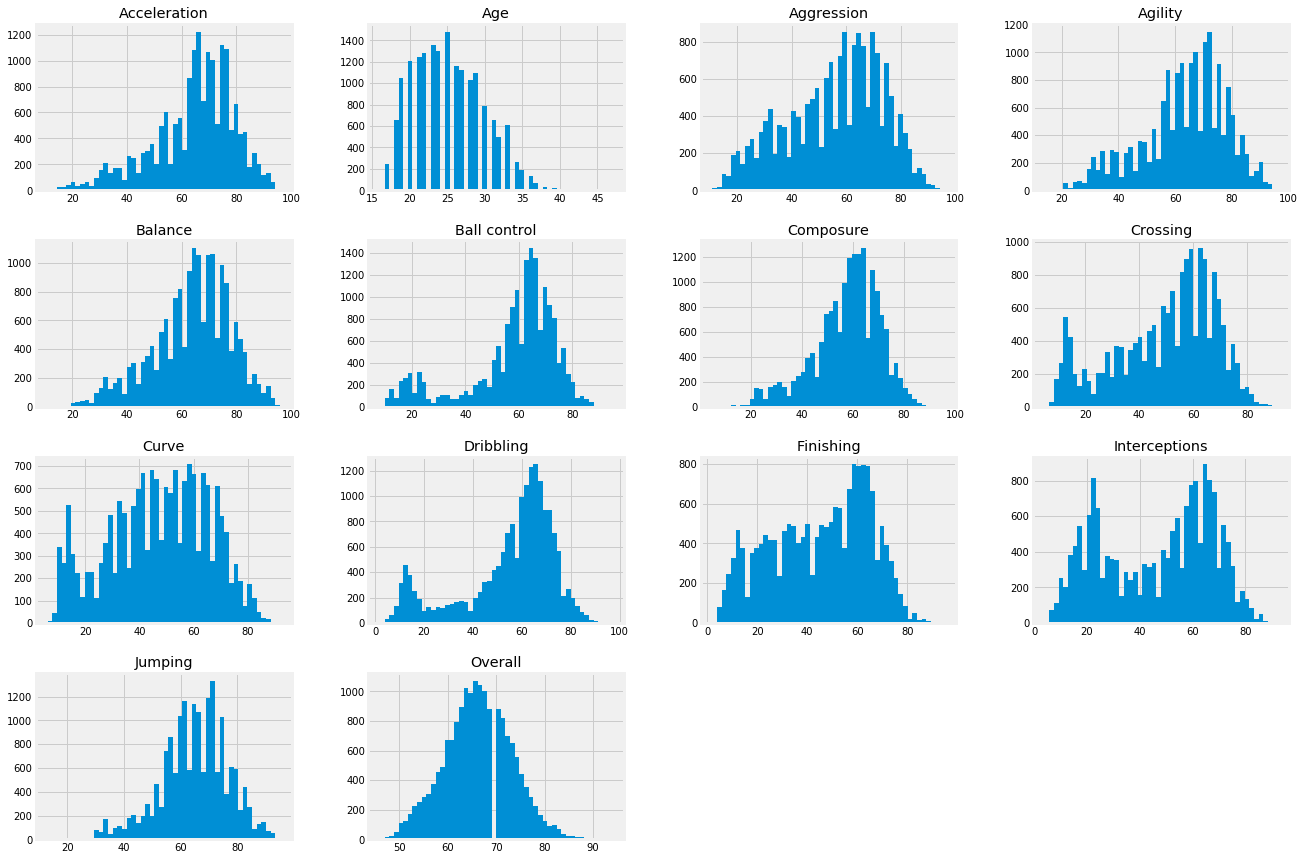

In [26]:
fifa18.hist(bins=50,figsize=(20,15))
plt.show()

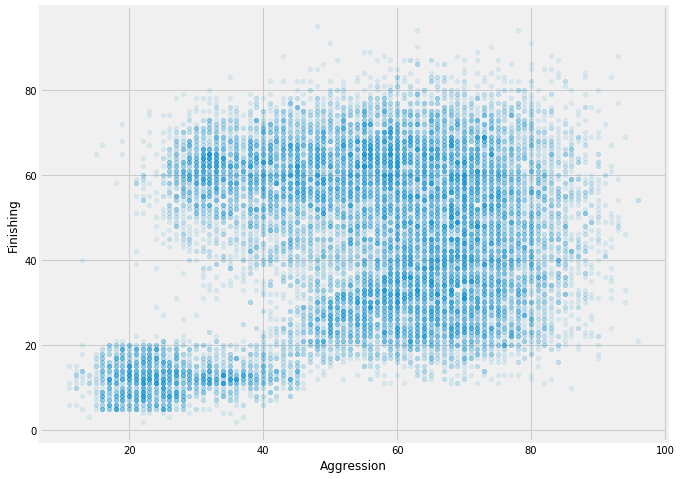

In [27]:
fifa18.plot(kind="scatter", x="Aggression", y="Finishing",figsize=(10,8),alpha = 0.1)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


X_all = numerical.drop("Age",1)
y_all = numerical["Age"]

scaled_data = StandardScaler().fit_transform(X_all)
scaled = pd.DataFrame(scaled_data)
#dummies = pd.get_dummies(X_all[cat_features],prefix = [col for col, col_data in X_all[cat_features].iteritems()])

#df = dummies.join(scaled)

X_train, X_test, y_train ,y_test = train_test_split(scaled, y_all, random_state= 0,test_size = 0.25)


In [12]:
forest_reg = RandomForestRegressor()
forest_reg.fit(scaled, y_all)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
print('Accuracy on the training subset: {:3f}'.format(forest_reg.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(forest_reg.score(X_test, y_test)))


Accuracy on the training subset: 0.894917
Accuracy on the testing subset: 0.893391


In [14]:

param_grid = [
    {'n_estimators': [3,10, 30], 'max_features': [2,4,6,8]},
    
    {'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                         scoring='neg_mean_squared_error')

grid_search.fit(scaled, y_all)
grid_search.best_params_


{'max_features': 4, 'n_estimators': 30}

In [15]:
forest_reg = RandomForestRegressor(max_features = 6,n_estimators= 30)
forest_reg.fit(scaled, y_all)
print('Accuracy on the training subset: {:3f}'.format(forest_reg.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(forest_reg.score(X_test, y_test)))


Accuracy on the training subset: 0.918743
Accuracy on the testing subset: 0.915735


In [16]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.16336463, 0.10260183, 0.08284222, 0.05195559, 0.04974362,
       0.05003195, 0.11849402, 0.0689121 , 0.06838126, 0.06080113,
       0.05829037, 0.06867377, 0.0559075 ])

In [17]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [18]:
cols = list(fifa18.columns)
cols

['Name',
 'Age',
 'Nationality',
 'Overall',
 'Club',
 'Value',
 'Wage',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Interceptions',
 'Jumping']

In [19]:
sorted(zip(feature_importances,cols),reverse=True)

[(0.16336462684252975, 'Name'),
 (0.11849402148465567, 'Wage'),
 (0.10260183197667744, 'Age'),
 (0.08284222020191136, 'Nationality'),
 (0.06891210099327409, 'Acceleration'),
 (0.06867377492945227, 'Ball control'),
 (0.06838126447949587, 'Aggression'),
 (0.060801133724516614, 'Agility'),
 (0.058290371748320864, 'Balance'),
 (0.05590749713755831, 'Composure'),
 (0.05195558839094461, 'Overall'),
 (0.05003194534317765, 'Value'),
 (0.04974362274748557, 'Club')]

In [20]:
fifa18.describe()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Interceptions,Jumping
count,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000,17513.000000
mean,25.159539,66.220408,64.457946,55.712613,63.234740,63.746417,57.973277,57.816479,49.671558,47.182493,54.908982,45.150174,46.509793,64.844744
std,4.622898,7.000029,14.957320,17.518835,14.835942,14.151922,16.895822,12.974322,18.513430,18.499316,19.081823,19.510869,20.705541,11.916219
min,16.000000,46.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,4.000000,13.000000
25%,21.000000,62.000000,56.000000,43.000000,55.000000,55.000000,53.000000,51.000000,37.000000,34.000000,48.000000,29.000000,26.000000,58.000000
50%,25.000000,66.000000,67.000000,58.000000,65.000000,66.000000,62.000000,60.000000,54.000000,48.000000,60.000000,48.000000,52.000000,66.000000
75%,28.000000,71.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,68.000000,61.000000,64.000000,73.000000
max,47.000000,94.000000,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,97.000000,95.000000,92.000000,95.000000


In [21]:
dribble = fifa18.loc[(fifa18['Dribbling'] >= 85) & (fifa18['Curve'] >= 85) | (fifa18['Finishing'] >= 90)]
aggression = fifa18.loc[(fifa18['Aggression'] >= 85) | (fifa18['Jumping'] >= 80)]
old = fifa18.loc[(fifa18['Age'] >= 30  ) & (fifa18['Overall'] >= 85 )]
young = fifa18.loc[(fifa18['Age'] <= 20  ) & (fifa18['Overall'] >= 76)]
ajax = fifa18.loc[(fifa18['Club'] == 'Ajax') ]
ajax_young = ajax.loc[(ajax['Age'] <= 25 )]
  

                   

In [22]:
club_group = fifa18.groupby('Club')['Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Interceptions',
 'Jumping'].mean().dropna()
#club_group = group_sectors.groupby('Cyclicality')['Annual Return', 'Annual Volatility', 'Sharpe Ratio'].mean()
sectors = club_group.sort_values(by='Curve',ascending =False)
sectors.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Interceptions,Jumping
Club,,,,,,,,,,,,
FC Barcelona,73.320000,63.440000,72.760000,70.440000,75.440000,74.800000,65.200000,66.800000,70.960000,61.720000,60.440000,71.040000
Real Madrid CF,72.360000,64.000000,72.640000,69.560000,75.920000,73.800000,64.960000,63.360000,70.320000,59.320000,61.880000,70.680000
Sevilla FC,65.076923,64.423077,67.192308,62.615385,69.884615,67.923077,63.076923,62.538462,65.269231,54.269231,57.192308,64.153846
Colo-Colo,71.300000,63.100000,66.050000,63.650000,65.050000,71.000000,59.400000,62.000000,61.650000,53.350000,51.500000,64.350000
FC Bayern Munich,69.500000,60.846154,69.423077,67.346154,71.076923,70.346154,61.576923,61.307692,66.807692,53.653846,58.961538,67.346154


In [23]:
dribble
aggression.head(15)
old
young
ajax_young

,Name,Age,Nationality,Overall,Club,Value,Wage,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Interceptions,Jumping
317,H. Ziyech,24,Morocco,81,Ajax,€23M,€16K,74,66,77,60,80,78,86,90,79,70,66,42
696,K. Dolberg,19,Denmark,78,Ajax,€16.5M,€10K,73,44,75,70,79,80,42,67,76,78,21,72
700,A. Onana,21,Cameroon,78,Ajax,€11M,€8K,64,23,68,53,38,33,15,30,26,12,15,80
872,A. Onana,21,Cameroon,78,Ajax,€11M,€8K,64,23,68,53,38,33,15,30,26,12,15,80
1083,J. Veltman,25,Netherlands,77,Ajax,€8.5M,€13K,63,81,67,68,71,74,70,40,68,50,80,72
1096,A. Younes,23,Germany,77,Ajax,€11.5M,€15K,86,55,86,92,84,69,65,78,88,62,30,37
1339,B. van Leer,25,Netherlands,76,Ajax,€7M,€11K,44,41,43,57,23,52,12,9,11,12,13,70
1485,D. van de Beek,20,Netherlands,76,Ajax,€11.5M,€12K,66,68,71,58,79,78,67,66,73,67,74,70
1555,M. de Ligt,17,Netherlands,76,Ajax,€11.5M,€7K,62,74,60,44,72,67,47,48,67,44,70,80
1689,D. Sinkgraven,21,Netherlands,75,Ajax,€7.5M,€9K,82,74,85,69,78,70,75,75,78,57,75,78


In [24]:
young.describe()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Interceptions,Jumping
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,19.512821,77.487179,75.230769,62.794872,73.820513,71.179487,74.051282,71.051282,60.641026,59.615385,71.615385,57.794872,55.102564,70.487179
std,0.823081,1.985100,12.319137,16.949118,12.535994,12.694532,14.279077,7.728787,16.826494,18.652805,17.161179,20.292829,22.760532,9.819079
min,17.000000,76.000000,46.000000,20.000000,40.000000,38.000000,10.000000,45.000000,12.000000,12.000000,14.000000,6.000000,15.000000,52.000000
25%,19.000000,76.000000,69.000000,51.000000,67.000000,65.000000,73.000000,68.000000,59.500000,54.000000,70.500000,44.000000,32.500000,63.500000
50%,20.000000,77.000000,74.000000,67.000000,73.000000,71.000000,78.000000,72.000000,66.000000,66.000000,76.000000,65.000000,69.000000,73.000000
75%,20.000000,78.000000,85.000000,75.500000,85.000000,78.000000,80.000000,75.000000,72.000000,73.000000,82.500000,72.000000,75.500000,77.500000
max,20.000000,83.000000,93.000000,90.000000,93.000000,92.000000,87.000000,84.000000,81.000000,84.000000,92.000000,87.000000,80.000000,86.000000


In [25]:
watford = fifa18.loc[(fifa18['Club'] == 'Watford') ]
watford

,Name,Age,Nationality,Overall,Club,Value,Wage,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Interceptions,Jumping
263,O. Karnezis,31,Greece,82,Watford,€13.5M,€30K,44,18,45,49,23,22,19,11,15,16,23,64
442,R. Pereyra,26,Argentina,80,Watford,€18M,€69K,78,66,79,75,83,78,78,78,82,61,72,66
641,S. Prödl,30,Austria,79,Watford,€9.5M,€63K,38,85,30,29,57,68,44,32,30,34,74,64
687,Gomes,36,Brazil,79,Watford,€1.7M,€33K,50,40,56,53,25,63,15,12,15,15,20,76
742,A. Doucouré,24,France,78,Watford,€12M,€45K,62,77,60,67,80,70,68,41,78,70,78,71
892,J. Holebas,33,Greece,78,Watford,€4M,€53K,78,89,74,75,75,77,79,69,73,57,68,74
962,A. Carrillo,26,Peru,77,Watford,€10.5M,€15K,86,53,80,77,79,73,76,78,79,71,34,74
1030,M. Zárate,30,Argentina,77,Watford,€8.5M,€63K,79,66,87,74,87,72,66,81,86,78,38,69
1033,A. Gray,26,England,77,Watford,€11M,€63K,90,70,78,75,70,71,61,57,72,80,33,72
1136,S. Okaka,27,Italy,77,Watford,€9.5M,€63K,67,73,57,47,75,71,50,58,75,74,21,76


In [26]:
deutschland = fifa18.loc[(fifa18['Nationality'] == 'Germany')& (fifa18['Overall'] >= 80) ]
deutschland

,Name,Age,Nationality,Overall,Club,Value,Wage,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Interceptions,Jumping
4,M. Neuer,31,Germany,92,FC Bayern Munich,€61M,€230K,58,29,52,35,48,70,15,14,30,13,30,78
8,T. Kroos,27,Germany,90,Real Madrid CF,€79M,€340K,60,60,71,69,89,85,85,85,79,76,85,32
25,J. Boateng,28,Germany,88,FC Bayern Munich,€48M,€215K,72,82,58,53,71,86,69,56,67,34,83,75
27,M. Hummels,28,Germany,88,FC Bayern Munich,€48M,€215K,62,66,64,58,77,91,64,65,68,55,89,68
28,M. Özil,28,Germany,88,Arsenal,€60M,€265K,75,48,83,70,90,78,82,84,86,74,24,52
52,T. Müller,27,Germany,86,FC Bayern Munich,€47.5M,€190K,76,57,76,72,82,83,77,81,75,87,58,81
55,M. Reus,28,Germany,86,Borussia Dortmund,€45M,€120K,86,49,86,81,85,83,80,90,86,86,50,72
77,B. Leno,25,Germany,85,Bayer 04 Leverkusen,€34M,€61K,46,28,52,44,22,62,9,9,16,9,22,73
78,M. ter Stegen,25,Germany,85,FC Barcelona,€35.5M,€155K,38,43,37,43,18,62,15,18,17,14,22,79
81,I. Gündoğan,26,Germany,85,Manchester City,€46M,€190K,73,68,83,81,88,86,74,81,87,72,79,62


In [27]:
deutschland['Club'].value_counts()

Bayer 04 Leverkusen         7
FC Bayern Munich            7
Borussia Dortmund           6
Arsenal                     3
TSG 1899 Hoffenheim         3
Paris Saint-Germain         2
FC Schalke 04               2
Liverpool                   2
Manchester City             2
1. FC Köln                  2
Juventus                    2
VfL Wolfsburg               2
Chicago Fire Soccer Club    1
Chelsea                     1
SV Werder Bremen            1
Borussia Mönchengladbach    1
Vissel Kobe                 1
Real Madrid CF              1
RB Leipzig                  1
FC Barcelona                1
Name: Club, dtype: int64

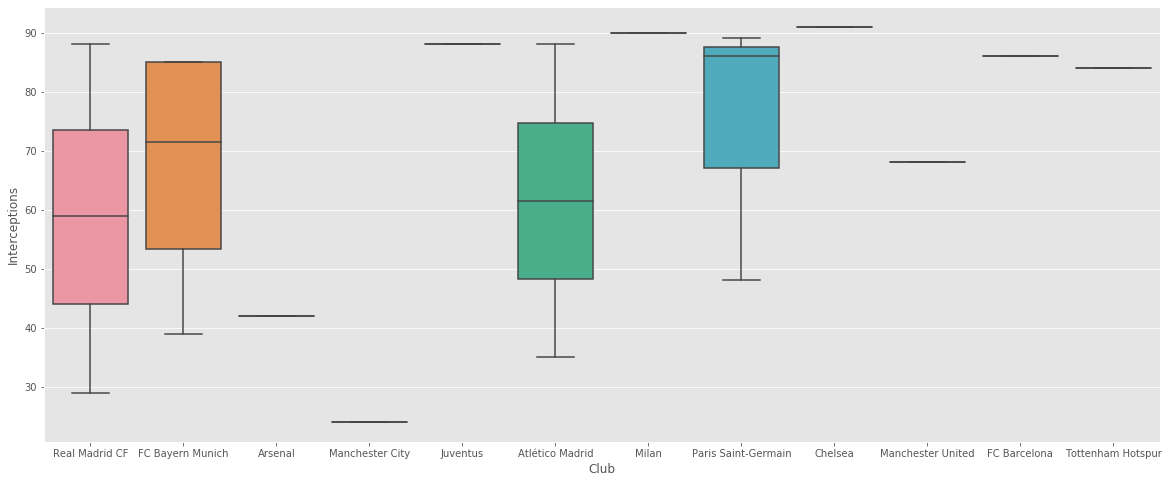

In [28]:
plt.figure(figsize=(20,8))

sns.boxplot(x="Club", y="Interceptions", data=aggression[:20])
plt.show()

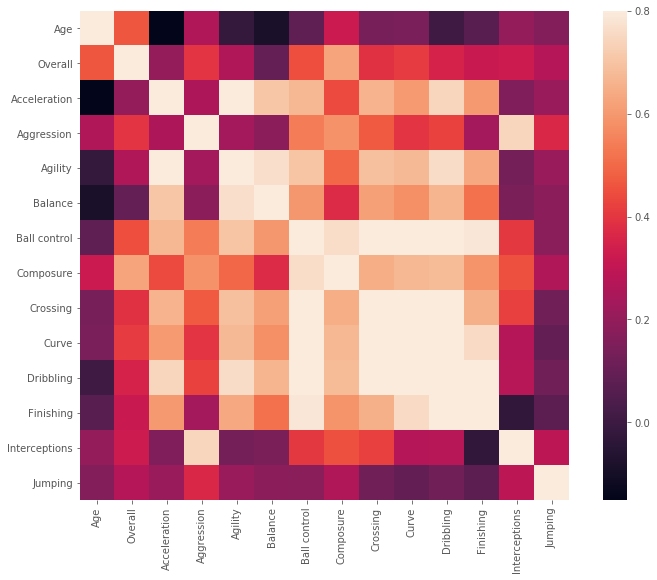

In [29]:
corrmat = fifa18[num_attributes].corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax = .8,square = True)
plt.show()

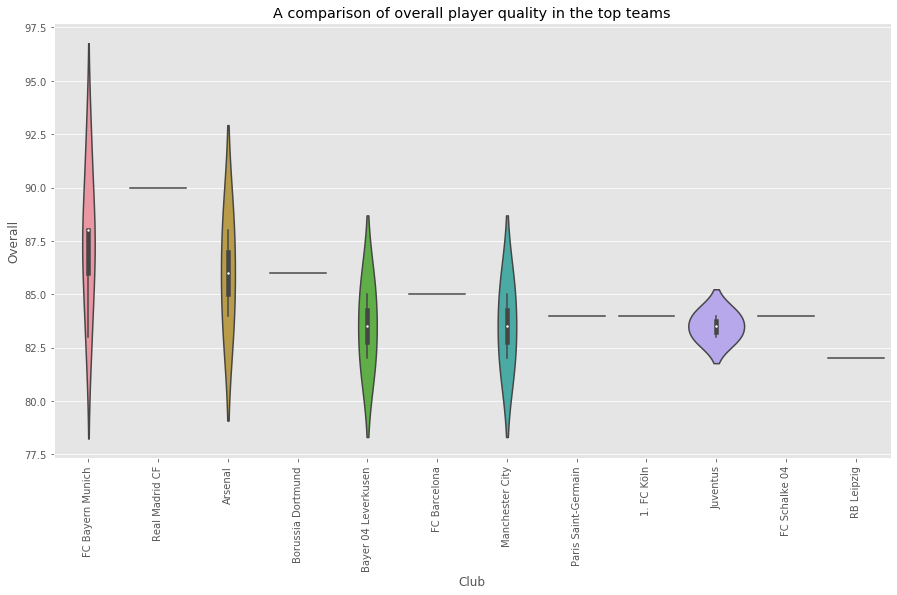

In [31]:
plt.figure(figsize=(15,8))

sns.violinplot(x="Club", y="Overall", data=deutschland[:20])
plt.xticks(rotation=90)
plt.title("A comparison of overall player quality in the top teams")
plt.show()